File to import, clean, and analyze data. Can then move the code to a different file for proper documentation purposes.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# URL for the dataset
url = "https://github.com/JeffSackmann/tennis_atp/blob/master"

# Load the dataset, going from 2004 to 2024 (picking only atp_matches_years.csv)
years = list(range(2004, 2025))
matches = []
for year in years:
    file_url = f"{url}/atp_matches_{year}.csv?raw=true"
    df = pd.read_csv(file_url)
    matches.append(df)
# Concatenate all dataframes into one
matches_df = pd.concat(matches, ignore_index=True)
# Drop duplicates
# matches_df.drop_duplicates(inplace=True)
# Reset index
matches_df.reset_index(drop=True, inplace=True)

# Display the first few rows of the dataframe
print(matches_df.head())
# Display the shape of the dataframe
print(matches_df.shape)
# Display the columns of the dataframe
print(matches_df.columns)
# Display the data types of the columns
print(matches_df.dtypes)
# Display the summary statistics of the dataframe
print(matches_df.describe())

  tourney_id    tourney_name surface  draw_size tourney_level  tourney_date  \
0  2004-1536  Madrid Masters    Hard         48             M      20041018   
1  2004-1536  Madrid Masters    Hard         48             M      20041018   
2  2004-1536  Madrid Masters    Hard         48             M      20041018   
3  2004-1536  Madrid Masters    Hard         48             M      20041018   
4  2004-1536  Madrid Masters    Hard         48             M      20041018   

   match_num  winner_id  winner_seed winner_entry  ... l_1stIn l_1stWon  \
0          1     102610          NaN          NaN  ...    64.0     40.0   
1          2     103344          NaN          NaN  ...    29.0     21.0   
2          3     102179          NaN            Q  ...    28.0     23.0   
3          4     103084          NaN          NaN  ...    53.0     35.0   
4          5     104417          NaN          NaN  ...    37.0     27.0   

   l_2ndWon l_SvGms  l_bpSaved  l_bpFaced  winner_rank winner_rank_points 

In [7]:
print(matches_df["score"].unique())

['6-2 5-7 7-5' '6-4 6-4' '5-7 7-5 6-1' ... '6-1 6-7(8) 7-5'
 '6-7(5) 6-4 [6-10]' '4-6 6-3 4-0']


G is Grand Slam
F is Finals
M is Masters
A is Other
D is Davis Cup
O is Null?


In [ ]:
# Quantify the data types of the columns
matches_df["surface"] = matches_df["surface"].map(
    {
        "Clay": 1,
        "Grass": 2,
        "Hard": 3,
        "Carpet": 4,
        "Indoor": 5,
        "Outdoor": 6,
    }
)  # Convert surface to numeric
matches_df["tourney_level"] = matches_df["tourney_level"].map(
    {
        "G": 1,
        "M": 2,
        "F": 3,
        "A": 4,
        "C": 5,
        "D": 6,
        "S": 7,
        "T": 8,
        "X": 9,
    }
)  # Convert tourney_level to numeric
matches_df["round"] = matches_df[
    "round"
].map(  # Convert round to numeric (num of players left)
    {
        "R64": 64,
        "R32": 32,
        "R16": 16,
        "QF": 8,
        "SF": 4,
        "F": 2,
        "R128": 128,
        "RR": 1,  # Round Robin
        "BR": 3,  # Best
        "ER": 0,
    }
)  # Early Round
matches_df["winner_hand"] = matches_df["winner_hand"].map(
    {
        "L": 1,
        "R": 2,
        "U": 3,
        "A": 4,
    }
)  # Convert winner_hand to numeric
matches_df["loser_hand"] = matches_df["loser_hand"].map(
    {
        "L": 1,
        "R": 2,
        "U": 3,
        "A": 4,
    }
)  # Convert loser_hand to numeric
# matches_df["score"] = matches_df["score"].apply(lambda x: )

In [12]:
metrics_df = matches_df[
    [
        "w_ace",
        "w_df",
        "w_svpt",
        "w_1stWon",
        "w_1stIn",
        "w_2ndWon",
        "w_SvGms",
        "w_bpSaved",
        "w_bpFaced",
        "l_ace",
        "l_df",
        "l_svpt",
        "l_1stWon",
        "l_1stIn",
        "l_2ndWon",
        "l_SvGms",
        "l_bpSaved",
        "l_bpFaced",
    ]
].copy()

general_df = matches_df[
    [
        "surface",
        "tourney_level",
        "round",
        "draw_size",
        "match_num",
        "winner_seed",
        "loser_seed",
    ]
].copy()

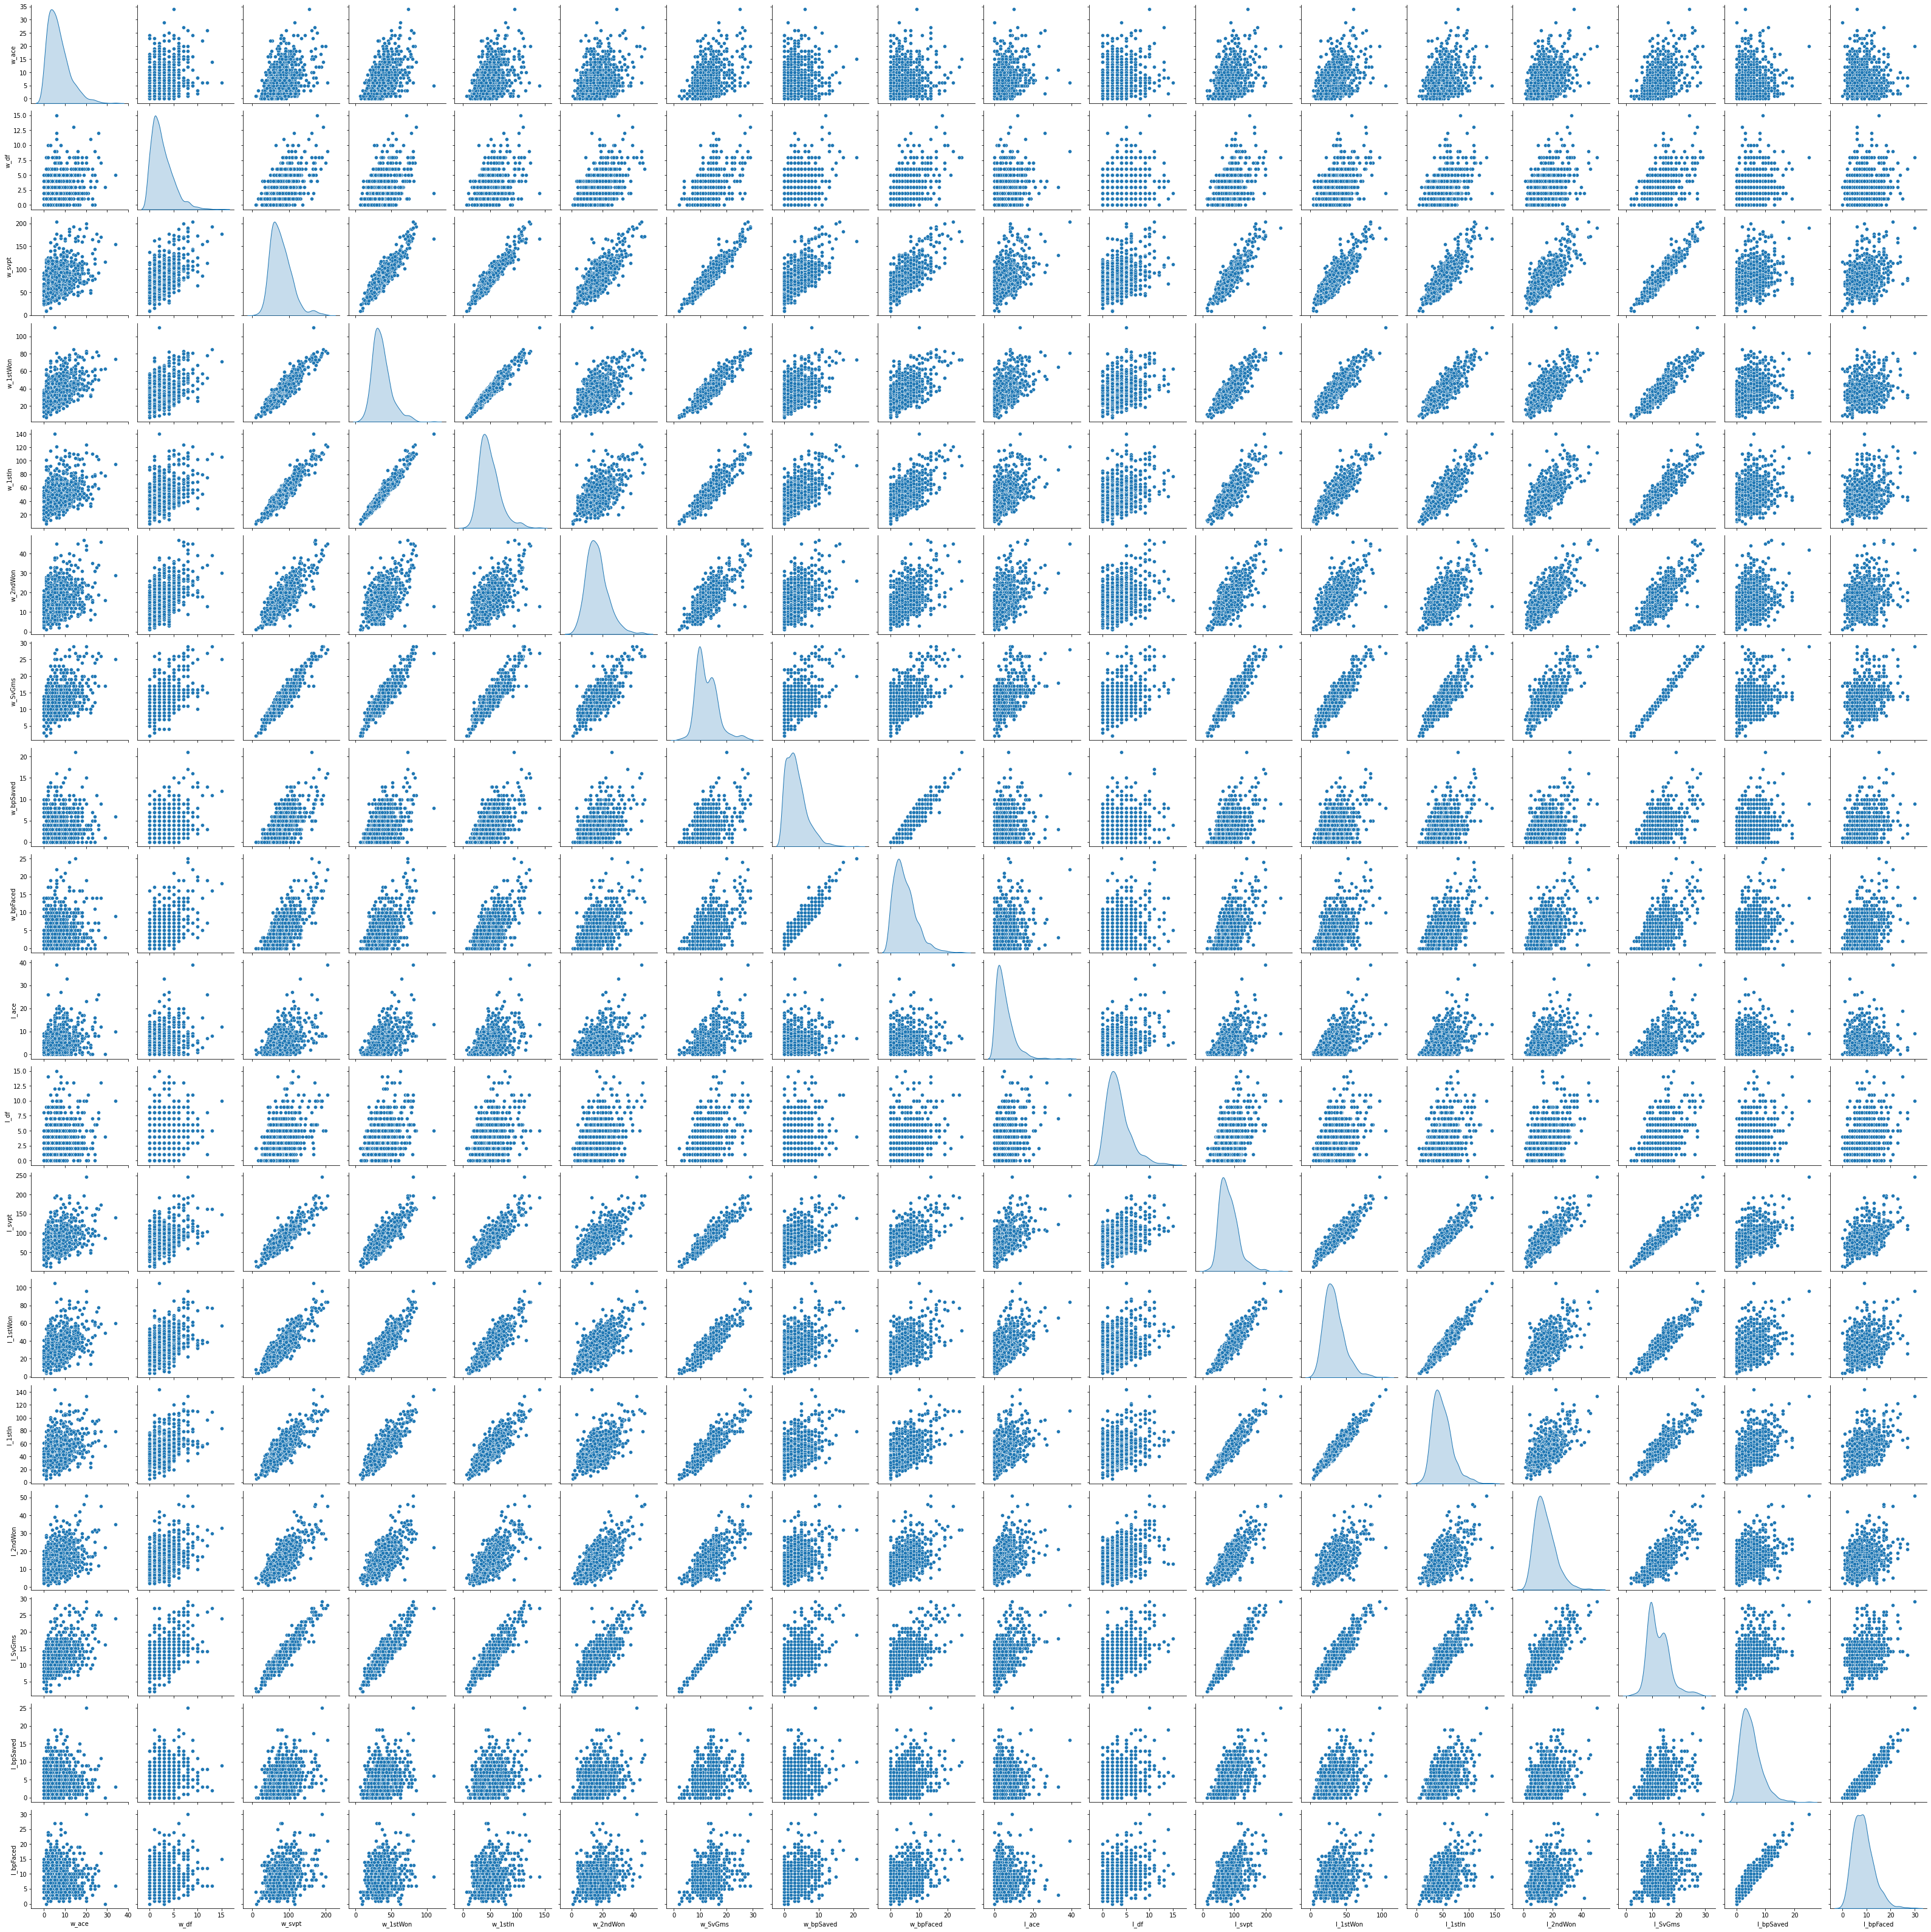

In [13]:
# Choose randomly 1000 rows from the dataframe
metrics_df = metrics_df.sample(n=1000, random_state=1)

# Pairplot of the metrics data
sns.pairplot(metrics_df, diag_kind="kde")
plt.savefig("pairplot_metrics.png")
plt.show()

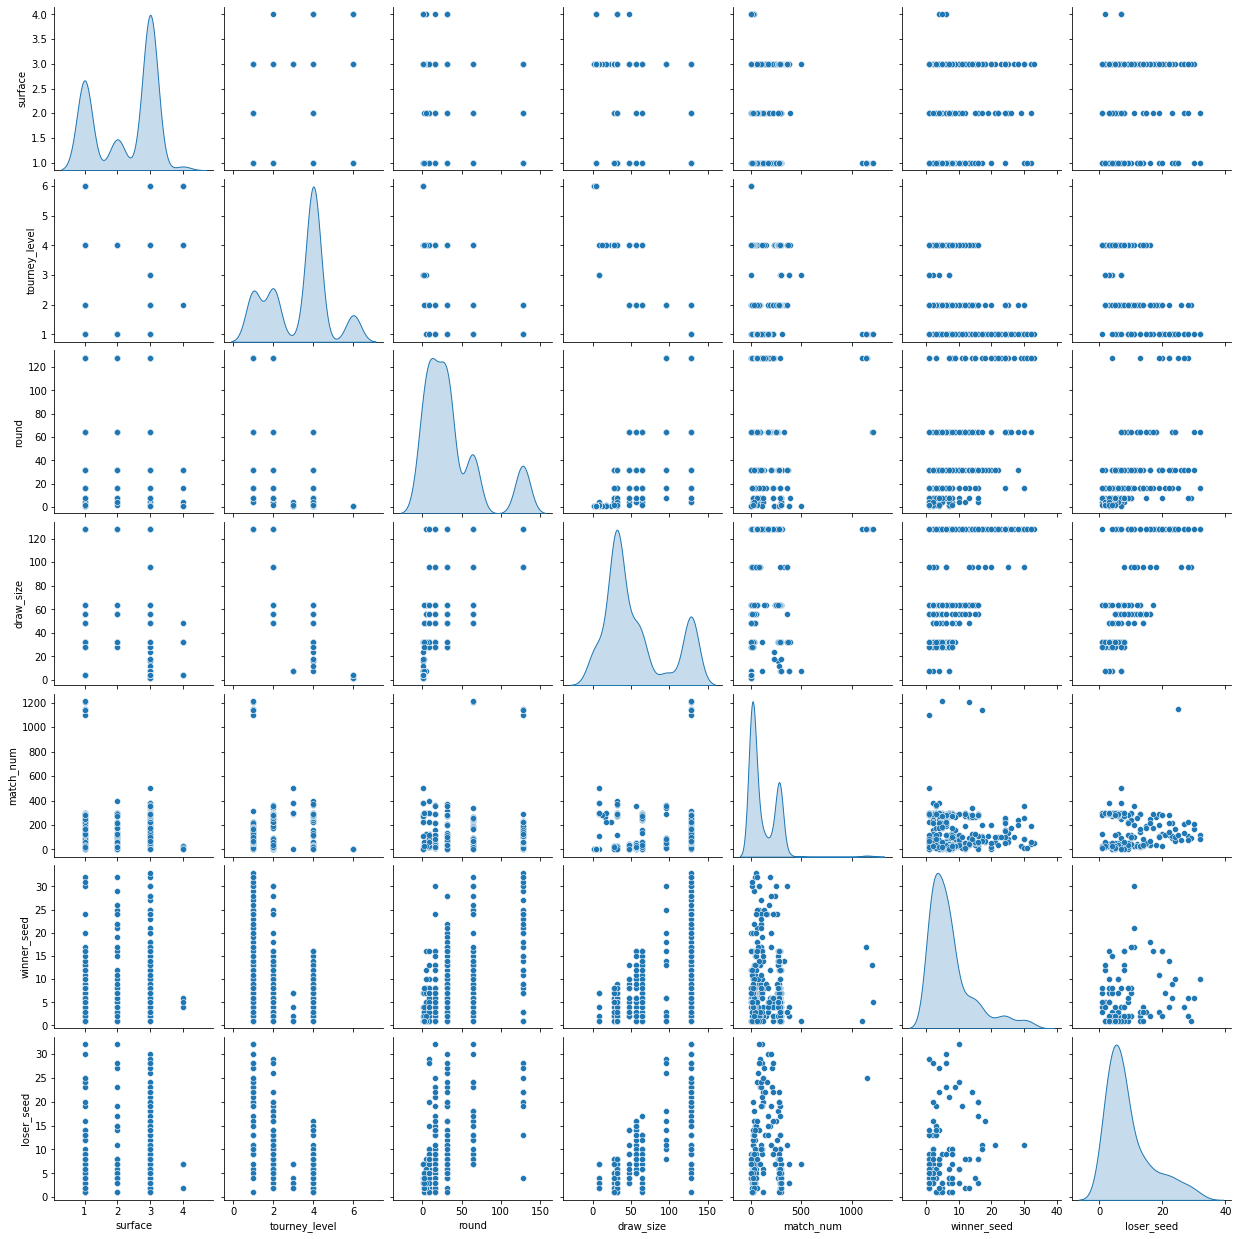

In [16]:
# Choose randomly 1000 rows from the dataframe
# general_df = general_df.sample(n=10000, random_state=1)

# Pairplot of the metrics data
sns.pairplot(general_df, diag_kind="kde")
plt.savefig("pairplot_metrics.png")
plt.show()

In [ ]:
# Correlation matrix
corr = metrics_df.corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.png")
plt.show()

In [4]:
# Output all unique values for surface
# print(matches_df['surface'].unique())

# Separate the data by surface
hard_df = matches_df[matches_df["surface"] == "Hard"]
clay_df = matches_df[matches_df["surface"] == "Clay"]
grass_df = matches_df[matches_df["surface"] == "Grass"]

# # Pairplot of the data
# sns.pairplot(matches_df, hue="surface", diag_kind="kde")
# plt.savefig("pairplot.png")
# plt.show()
# # Display the correlation matrix
# corr = matches_df.corr()
# # Display the correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Correlation Matrix")
# plt.savefig("correlation_matrix.png")
# plt.show()